In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
tel = pd.read_csv('../data/tel.csv')
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
services = pd.read_excel('../data/Telco_customer_churn_services.xlsx')

services.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [35]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.loc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.loc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.loc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [36]:
resumetable(services)

데이터셋 크기: (7043, 30)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,Customer ID,object,0,7043,8779-QRDMV,7495-OOKFY,1658-BYGOY
1,Count,int64,0,1,1,1,1
2,Quarter,object,0,1,Q3,Q3,Q3
3,Referred a Friend,object,0,2,No,Yes,No
4,Number of Referrals,int64,0,12,0,1,0
5,Tenure in Months,int64,0,72,1,8,18
6,Offer,object,3877,5,NaN,Offer E,Offer D
7,Phone Service,object,0,2,No,Yes,Yes
8,Avg Monthly Long Distance Charges,float64,0,3584,0.0,48.85,11.33
9,Multiple Lines,object,0,2,No,Yes,Yes


In [37]:
services = services.rename(columns={
    'Customer ID': '고객ID',
    'Count' : '카운트',
    'Quarter' : '분기',
    'Referred a Friend' : '친구추천여부',
    'Number of Referrals' : '친구추천횟수',
    'Tenure in Months' : '가입개월수2',
    'Offer' : '가입혜택',
    'Phone Service' : '전화서비스가입여부',
    'Avg Monthly Long Distance Charges' : '장거리통화요금',
    'Multiple Lines' : '복수회선여부',
    # 'Internet Service' : '인터넷서비스유형',
    'Internet Type' : '인터넷서비스유형',
    'Avg Monthly GB Download' : '월평균다운로드용량(GB)',
    'Online Security' : '온라인보안서비스여부',
    'Online Backup' : '온라인백업서비스여부',
    'Device Protection Plan' : '기기보호서비스여부',
    'Premium Tech Support' : '프리미엄기술지원여부',
    'Streaming TV' : 'TV스트리밍이용여부',
    'Streaming Movies' : '영화스트리밍이용여부',
    'Streaming Music' : '음악스트리밍이용여부',
    'Unlimited Data' : '무제한데이터이용여부',
    'Contract' : '계약기간유형',
    'Paperless Billing' : '전자청구서이용여부',
    'Payment Method' : '결제방법2',
    'Monthly Charge' : '월요금',
    'Total Charges' : '총요금',
    'Total Refunds' : '총환불액',
    'Total Extra Data Charges' : '총초과데이터요금',
    'Total Long Distance Charges' : '총장거리통화요금',
    'Total Revenue' : '총납부금'
}) 

In [38]:
services.replace({'Yes': True, 'No': False},inplace = True)

C:\Users\win11\AppData\Local\Temp\ipykernel_24100\281477998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  services.replace({'Yes': True, 'No': False},inplace = True)


In [39]:
services.head(20)

,고객ID,카운트,분기,친구추천여부,친구추천횟수,가입개월수2,가입혜택,전화서비스가입여부,장거리통화요금,복수회선여부,...,무제한데이터이용여부,계약기간유형,전자청구서이용여부,결제방법2,월요금,총요금,총환불액,총초과데이터요금,총장거리통화요금,총납부금
0,8779-QRDMV,1,Q3,False,0,1,NaN,False,0.00,False,...,False,Month-to-Month,True,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,True,1,8,Offer E,True,48.85,True,...,True,Month-to-Month,True,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,False,0,18,Offer D,True,11.33,True,...,True,Month-to-Month,True,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,True,1,25,Offer C,True,19.76,False,...,True,Month-to-Month,True,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,True,1,37,Offer C,True,6.33,True,...,True,Month-to-Month,True,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
5,4412-YLTKF,1,Q3,False,0,27,Offer C,True,3.33,True,...,False,Month-to-Month,True,Bank Withdrawal,78.05,2135.50,0.00,10,89.91,2235.41
6,0390-DCFDQ,1,Q3,True,1,1,Offer E,True,15.28,False,...,True,Month-to-Month,True,Mailed Check,70.45,70.45,0.00,0,15.28,85.73
7,3445-HXXGF,1,Q3,True,6,58,Offer B,False,0.00,False,...,True,Month-to-Month,True,Bank Withdrawal,45.30,2651.20,40.95,0,0.00,2610.25
8,2656-FMOKZ,1,Q3,False,0,15,Offer D,True,44.07,True,...,True,Month-to-Month,True,Mailed Check,74.45,1145.70,0.00,0,661.05,1806.75
9,2070-FNEXE,1,Q3,False,0,7,Offer E,True,26.95,False,...,False,Month-to-Month,False,Bank Withdrawal,76.45,503.60,11.05,0,188.65,681.20


In [40]:
resumetable(services)

데이터셋 크기: (7043, 30)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,고객ID,object,0,7043,8779-QRDMV,7495-OOKFY,1658-BYGOY
1,카운트,int64,0,1,1,1,1
2,분기,object,0,1,Q3,Q3,Q3
3,친구추천여부,bool,0,2,False,True,False
4,친구추천횟수,int64,0,12,0,1,0
5,가입개월수2,int64,0,72,1,8,18
6,가입혜택,object,3877,5,NaN,Offer E,Offer D
7,전화서비스가입여부,bool,0,2,False,True,True
8,장거리통화요금,float64,0,3584,0.0,48.85,11.33
9,복수회선여부,bool,0,2,False,True,True


In [41]:
services.dtypes

고객ID                 object
카운트                   int64
분기                   object
친구추천여부                 bool
친구추천횟수                int64
가입개월수2                int64
가입혜택                 object
전화서비스가입여부              bool
장거리통화요금             float64
복수회선여부                 bool
Internet Service       bool
인터넷서비스유형             object
월평균다운로드용량(GB)         int64
온라인보안서비스여부             bool
온라인백업서비스여부             bool
기기보호서비스여부              bool
프리미엄기술지원여부             bool
TV스트리밍이용여부             bool
영화스트리밍이용여부             bool
음악스트리밍이용여부             bool
무제한데이터이용여부             bool
계약기간유형               object
전자청구서이용여부              bool
결제방법2                object
월요금                 float64
총요금                 float64
총환불액                float64
총초과데이터요금              int64
총장거리통화요금            float64
총납부금                float64
dtype: object

In [50]:
# 1. 필요한 열만 추출
tel_sub = tel[['고객ID', '인터넷서비스유형']].copy()
services_sub = services[['고객ID', '인터넷서비스유형']].copy()

# 2. 이름 변경 (중복 방지용)
tel_sub.rename(columns={'인터넷서비스유형': '인터넷_기존'}, inplace=True)
services_sub.rename(columns={'인터넷서비스유형': '인터넷_신규'}, inplace=True)

# 3. 고객ID 기준 병합
merged = pd.merge(tel_sub, services_sub, on='고객ID', how='inner')

# 4. 비교 결과 추가
merged['일치여부'] = merged['인터넷_기존'] == merged['인터넷_신규']

# 5. 일치하지 않는 경우만 보기
diff = merged[merged['일치여부'] == False]

# 6. 어떤 값이 다른지 확인
print(diff['인터넷_기존'].value_counts())
print(diff['인터넷_신규'].value_counts())

# 7. 표로 일부 확인
diff.head()


KeyError: "None of [Index(['고객ID', '인터넷서비스유형'], dtype='object')] are in the [columns]"

In [ ]:
merged = pd.merge(
    tel[['고객ID', '인터넷서비스유형']],
    services[['고객ID', '인터넷서비스유형']],
    on='고객ID',
    suffixes=('_tel', '_services')
)


In [ ]:
fiber_mismatch = merged[
    (merged['인터넷서비스유형_tel'] == 'Fiber optic') |
    (merged['인터넷서비스유형_services'] == 'Fiber optic')
]

# 일치 여부 확인 컬럼 추가
fiber_mismatch['일치여부'] = fiber_mismatch['인터넷서비스유형_tel'] == fiber_mismatch['인터넷서비스유형_services']


In [ ]:
# 전체 개수 대비 일치 개수
총건수 = fiber_mismatch.shape[0]
일치건수 = fiber_mismatch['일치여부'].sum()

print(f"Fiber optic 관련 데이터 총 {총건수}건 중 {일치건수}건 일치합니다.")


In [ ]:
불일치 = fiber_mismatch[~fiber_mismatch['일치여부']]
불일치.head()


In [ ]:
# 비교용으로 소문자 + strip 적용
tel['인터넷서비스유형_정리'] = tel['인터넷서비스유형'].str.lower().str.strip()
services['인터넷서비스유형_정리'] = services['인터넷서비스유형'].str.lower().str.strip()

# 병합
merged = pd.merge(
    tel[['고객ID', '인터넷서비스유형_정리']],
    services[['고객ID', '인터넷서비스유형_정리']],
    on='고객ID',
    suffixes=('_tel', '_services')
)

# 일치 여부
merged['일치여부'] = merged['인터넷서비스유형_정리_tel'] == merged['인터넷서비스유형_정리_services']

# 결과 확인
총 = merged.shape[0]
일치 = merged['일치여부'].sum()
print(f"{총}건 중 {일치}건이 일치합니다.")


In [ ]:
# 일치하지 않는 행 추출
불일치 = merged[~merged['일치여부']]
불일치.head()


In [ ]:
# 문자열 비교 용이하도록 소문자로 통일
tel['인터넷서비스유형'] = tel['인터넷서비스유형'].str.lower()
services['인터넷서비스유형'] = services['인터넷서비스유형'].str.lower()

# '고객ID' 기준 병합
merged = tel[['고객ID', '인터넷서비스유형']].merge(
    services[['고객ID', '인터넷서비스유형']],
    on='고객ID',
    how='inner',
    suffixes=('_tel', '_services')
)

# 조건 비교: tel은 'false', services는 NaN
merged['일치여부'] = (merged['인터넷서비스유형_tel'] == 'false') & (merged['인터넷서비스유형_services'].isna())

# 결과 확인
일치_결과 = merged[merged['일치여부']]
일치_결과.head()


In [ ]:
일치_개수 = merged['일치여부'].sum()
print(f"일치하는 개수: {일치_개수}")


In [ ]:
# # tel의 fiber optic/dsl 중 ser가 cable인 경우
# condition = (merged['인터넷서비스유형_tel'].isin(['fiber optic', 'dsl'])) & (merged['인터넷서비스유형_services'] == 'cable')

# matching_rows = merged[condition]



In [ ]:
services['가입혜택'] = services['가입혜택'].fillna('No')


In [ ]:
resumetable(services)

In [ ]:
services.drop(columns=['인터넷서비스유형_정리'], inplace=True)


In [ ]:
resumetable(services)

In [ ]:
services.drop(columns=['Internet Service', '인터넷서비스유형'], inplace=True)


In [ ]:
resumetable(services)

In [ ]:
services.drop(columns=['카운트'], inplace=True)


In [ ]:
resumetable(services)

In [ ]:
# 두 데이터프레임을 고객ID 기준으로 병합
merged = pd.merge(tel[['고객ID', '결제방법']], services[['고객ID', '결제방법2']], on='고객ID', how='inner')

# 결제방법 일치 여부 비교
merged['결제방법_일치여부'] = merged['결제방법'] == merged['결제방법2']

# 일치 / 불일치 개수 확인
일치수 = merged['결제방법_일치여부'].sum()
불일치수 = len(merged) - 일치수

print(f"결제방법 일치: {일치수}건")
print(f"결제방법 불일치: {불일치수}건")

# 불일치한 행만 확인하고 싶다면:
불일치_데이터 = merged[merged['결제방법_일치여부'] == False]
불일치_데이터.head()


In [ ]:
# tel['결제방법'] → services['결제방법2'] 대응
결제방법_매핑 = {
    'Mailed check': 'Mailed Check',
    'Bank transfer (automatic)': 'Bank Withdrawal',
    'Credit card (automatic)': 'Credit Card',
    'Electronic check': 'Electronic Check'
}


In [ ]:
# tel 결제방법을 표준 형식으로 바꿔줌
tel['결제방법_정리'] = tel['결제방법'].map(결제방법_매핑)

# 고객ID 기준으로 병합
merged = pd.merge(tel[['고객ID', '결제방법_정리']], services[['고객ID', '결제방법2']], on='고객ID', how='inner')

# 일치 여부 비교
merged['결제방법_일치여부'] = merged['결제방법_정리'] == merged['결제방법2']

# 결과 요약
일치수 = merged['결제방법_일치여부'].sum()
불일치수 = len(merged) - 일치수

print(f"결제방법 일치: {일치수}건")
print(f"결제방법 불일치: {불일치수}건")

# 불일치 항목 확인
불일치_데이터 = merged[merged['결제방법_일치여부'] == False]
불일치_데이터.head(10)


In [ ]:

일치_데이터 = merged[merged['결제방법_일치여부'] == True]
print(f"일치하는 항목 수: {len(일치_데이터)}")
일치_데이터.head()

In [ ]:
# 고객ID 기준으로 필요한 컬럼만 선택해서 병합
결제방법_비교 = pd.merge(
    tel[['고객ID', '결제방법']],
    services[['고객ID', '결제방법2']],
    on='고객ID',
    how='inner'  # 공통된 고객만 대상으로
)

# 결과 확인 (앞 5~20개 정도)
결제방법_비교.head(20)


In [ ]:
# 복사본으로 저장
결제방법_비교_복사 = 결제방법_비교.copy()


In [ ]:
# 1. 고객ID 기준으로 필요한 컬럼 병합
결제비교 = pd.merge(
    tel[['고객ID', '결제방법']],
    services[['고객ID', '결제방법2']],
    on='고객ID',
    how='inner'
)

# 2. 조건에 맞는 행만 필터링
조건일치 = (결제비교['결제방법'] == 'Mailed check') & (결제비교['결제방법2'] == 'Credit Card')
일치수 = 조건일치.sum()

# 3. 그 외의 경우 (즉, 위 조건이 아닌 나머지)
전체_Mailed = (결제비교['결제방법'] == 'Mailed check')
불일치수 = 전체_Mailed.sum() - 일치수

# 4. 출력
print(f"Mailed check ↔ Credit Card: {일치수}건")
print(f"Mailed check이지만 Credit Card가 아닌 경우: {불일치수}건")


In [ ]:
# 1. 병합된 테이블에서 Mailed check이면서 Credit Card가 아닌 경우 필터링
mailed_불일치 = 결제비교[
    (결제비교['결제방법'] == 'Mailed check') & 
    (결제비교['결제방법2'] != 'Credit Card')
]

# 2. 결과 확인 (예: 상위 10개)
mailed_불일치.head()

# 1. Mailed check ↔ Mailed Check 일치한 경우
일치수 = ((결제비교['결제방법'] == 'Mailed check') & 
          (결제비교['결제방법2'] == 'Mailed Check')).sum()

# 2. Mailed check인데 Mailed Check가 아닌 경우 (불일치)
전체_mailed_check = (결제비교['결제방법'] == 'Mailed check').sum()
불일치수 = 전체_mailed_check - 일치수

# 결과 출력
print(f"✅ 일치 (Mailed check ↔ Mailed Check): {일치수}건")
print(f"❌ 불일치 (Mailed check인데 Mailed Check 아님): {불일치수}건")

In [ ]:
# 1. 일치 조건: Electronic check ↔ Bank Withdrawal
일치수 = ((결제비교['결제방법'] == 'Electronic check') &
          (결제비교['결제방법2'] == 'Bank Withdrawal')).sum()

# 2. 전체 Electronic check인 경우
전체_echeck = (결제비교['결제방법'] == 'Electronic check').sum()

# 3. 불일치 개수
불일치수 = 전체_echeck - 일치수

# 결과 출력
print(f"✅ 일치 (Electronic check ↔ Bank Withdrawal): {일치수}건")
print(f"❌ 불일치 (Electronic check인데 Bank Withdrawal 아님): {불일치수}건")

In [63]:
# 1. 일치 조건: Bank transfer (automatic) ↔ Bank Withdrawal
일치수 = ((결제비교['결제방법'] == 'Bank transfer (automatic)') &
          (결제비교['결제방법2'] == 'Bank Withdrawal')).sum()

# 2. 전체 Bank transfer (automatic)인 경우
전체_banktransfer = (결제비교['결제방법'] == 'Bank transfer (automatic)').sum()

# 3. 불일치 개수
불일치수 = 전체_banktransfer - 일치수

# 결과 출력
print(f"✅ 일치 (Bank transfer (automatic) ↔ Bank Withdrawal): {일치수}건")
print(f"❌ 불일치 (Bank transfer (automatic)인데 Bank Withdrawal 아님): {불일치수}건")

NameError: name '결제비교' is not defined

In [ ]:
# 1. 일치 조건: Credit card (automatic) ↔ Credit Card
일치수 = ((결제비교['결제방법'] == 'Credit card (automatic)') &
          (결제비교['결제방법2'] == 'Credit Card')).sum()

# 2. 전체 Credit card (automatic)인 경우
전체_credcard = (결제비교['결제방법'] == 'Credit card (automatic)').sum()

# 3. 불일치 개수
불일치수 = 전체_credcard - 일치수

# 결과 출력
print(f"✅ 일치 (Credit card (automatic) ↔ Credit Card): {일치수}건")
print(f"❌ 불일치 (Credit card (automatic)인데 Credit Card 아님): {불일치수}건")

In [ ]:
services.drop(columns=['결제방법2'], inplace=True)

In [66]:
resumetable(services)

데이터셋 크기: (7043, 30)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,고객ID,object,0,7043,8779-QRDMV,7495-OOKFY,1658-BYGOY
1,카운트,int64,0,1,1,1,1
2,분기,object,0,1,Q3,Q3,Q3
3,친구추천여부,bool,0,2,False,True,False
4,친구추천횟수,int64,0,12,0,1,0
5,가입개월수2,int64,0,72,1,8,18
6,가입혜택,object,3877,5,NaN,Offer E,Offer D
7,전화서비스가입여부,bool,0,2,False,True,True
8,장거리통화요금,float64,0,3584,0.0,48.85,11.33
9,복수회선여부,bool,0,2,False,True,True


In [68]:
# 고객ID 기준으로 tel의 결제방법을 services에 병합
services = pd.merge(
    services,
    tel[['고객ID', '결제방법']],
    on='고객ID',
    how='left'  # services를 기준으로 붙이기 (왼쪽 기준)
)


KeyError: "None of [Index(['고객ID', '결제방법'], dtype='object')] are in the [columns]"

In [ ]:
services[['고객ID', '결제방법']].head()


In [71]:
# 고객ID 기준으로 tel의 이탈여부를 services에 병합
services = pd.merge(
    services,
    tel[['고객ID', '이탈여부']],
    on='고객ID',
    how='left'  # services 기준으로 유지
)


KeyError: "None of [Index(['고객ID', '이탈여부'], dtype='object')] are in the [columns]"

In [73]:
resumetable(services)

데이터셋 크기: (7043, 30)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,고객ID,object,0,7043,8779-QRDMV,7495-OOKFY,1658-BYGOY
1,카운트,int64,0,1,1,1,1
2,분기,object,0,1,Q3,Q3,Q3
3,친구추천여부,bool,0,2,False,True,False
4,친구추천횟수,int64,0,12,0,1,0
5,가입개월수2,int64,0,72,1,8,18
6,가입혜택,object,3877,5,NaN,Offer E,Offer D
7,전화서비스가입여부,bool,0,2,False,True,True
8,장거리통화요금,float64,0,3584,0.0,48.85,11.33
9,복수회선여부,bool,0,2,False,True,True


In [75]:
tell.to_csv("churn_services_전처리.csv", index=False, encoding="utf-8-sig", na_rep="NULL")

NameError: name 'tell' is not defined

In [77]:
numeric_df = services.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                  카운트    친구추천여부    친구추천횟수    가입개월수2  전화서비스가입여부   장거리통화요금  \
카운트               NaN       NaN       NaN       NaN        NaN       NaN   
친구추천여부            NaN  1.000000  0.708291  0.361844   0.015418  0.008702   
친구추천횟수            NaN  0.708291  1.000000  0.326975   0.009947  0.006336   
가입개월수2            NaN  0.361844  0.326975  1.000000   0.008271  0.014596   
전화서비스가입여부         NaN  0.015418  0.009947  0.008271   1.000000  0.486673   
장거리통화요금           NaN  0.008702  0.006336  0.014596   0.486673  1.000000   
복수회선여부            NaN  0.132641  0.078080  0.332101   0.279690  0.136004   
Internet Service  NaN  0.002842 -0.038984  0.038582  -0.172209 -0.068605   
월평균다운로드용량(GB)     NaN  0.055003  0.038575  0.049119  -0.102748 -0.030455   
온라인보안서비스여부        NaN  0.139510  0.142416  0.327543  -0.092893 -0.028108   
온라인백업서비스여부        NaN  0.143177  0.112369  0.360558  -0.052312 -0.013909   
기기보호서비스여부         NaN  0.154197  0.116695  0.360935  -0.071227 -0.031869   
프리미엄기술지원여부  

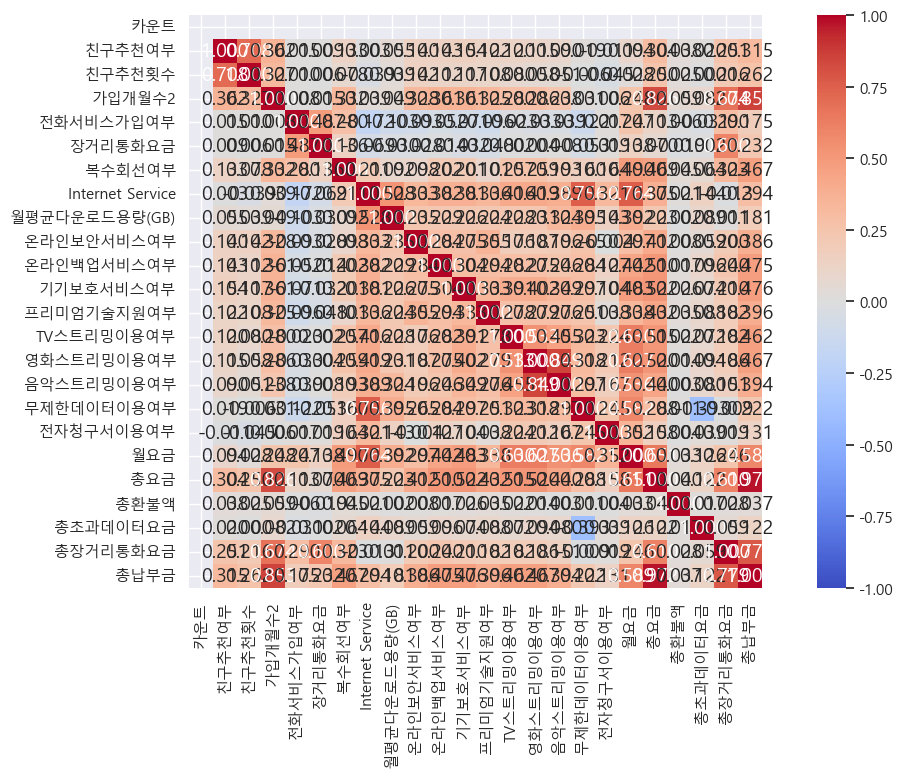

In [88]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

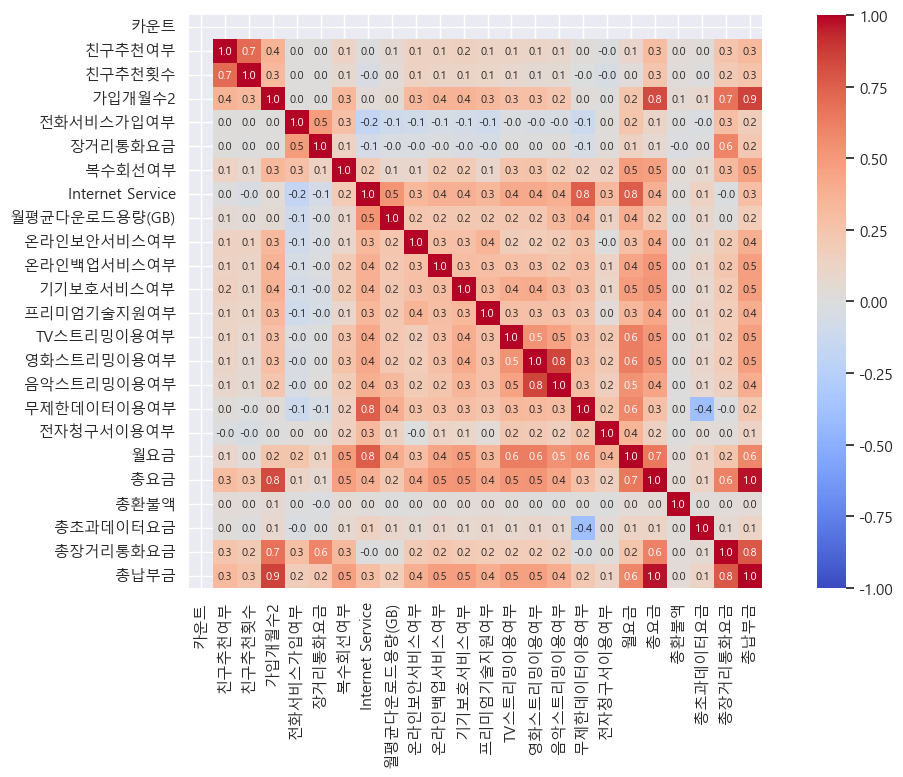

In [89]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1, annot_kws={"size": 8})
plt.tight_layout()
plt.show()

In [82]:
가입혜택 = ['No', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E']


In [83]:
services_encoded = pd.get_dummies(services, columns=['가입혜택'])


In [84]:
services_encoded = pd.get_dummies(services, columns=['가입혜택'], drop_first=True)


In [85]:
services_encoded.head()


,고객ID,카운트,분기,친구추천여부,친구추천횟수,가입개월수2,전화서비스가입여부,장거리통화요금,복수회선여부,Internet Service,...,월요금,총요금,총환불액,총초과데이터요금,총장거리통화요금,총납부금,가입혜택_Offer B,가입혜택_Offer C,가입혜택_Offer D,가입혜택_Offer E
0,8779-QRDMV,1,Q3,False,0,1,False,0.00,False,True,...,39.65,39.65,0.00,20,0.00,59.65,False,False,False,False
1,7495-OOKFY,1,Q3,True,1,8,True,48.85,True,True,...,80.65,633.30,0.00,0,390.80,1024.10,False,False,False,True
2,1658-BYGOY,1,Q3,False,0,18,True,11.33,True,True,...,95.45,1752.55,45.61,0,203.94,1910.88,False,False,True,False
3,4598-XLKNJ,1,Q3,True,1,25,True,19.76,False,True,...,98.50,2514.50,13.43,0,494.00,2995.07,False,True,False,False
4,4846-WHAFZ,1,Q3,True,1,37,True,6.33,True,True,...,76.50,2868.15,0.00,0,234.21,3102.36,False,True,False,False


In [86]:
# 가입혜택 컬럼을 원핫인코딩
services_encoded = pd.get_dummies(services, columns=['가입혜택'], drop_first=False)


In [87]:
# 가입혜택 관련 컬럼만 추출
가입혜택_columns = [col for col in services_encoded.columns if col.startswith('가입혜택_')]

# 가입혜택별 이탈률 계산
for col in 가입혜택_columns:
    탈퇴율 = services_encoded.loc[services_encoded[col] == 1, '이탈여부'].mean()
    print(f"{col} 이탈률: {탈퇴율:.2%}")


KeyError: '이탈여부'

In [ ]:
import matplotlib.pyplot as plt

이탈률 = {
    col: services_encoded.loc[services_encoded[col] == 1, '이탈여부'].mean()
    for col in 가입혜택_columns
}

plt.bar(이탈률.keys(), 이탈률.values())
plt.xticks(rotation=45)
plt.ylabel("이탈률")
plt.title("가입혜택별 이탈률")
plt.tight_layout()
plt.show()


In [ ]:
# services.to_csv('services_data.csv', index=True, encoding='utf-8-sig')